<a href="https://colab.research.google.com/github/rajeshchengannur/ML100days/blob/main/1_EndtoEndToyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd

In [13]:
df =pd.read_csv('placement.csv')

In [14]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [15]:
df.shape

(100, 4)

#Steps 
##0. Preprocess + EDA + Feature selection
##1. Extract input and output cols
##2. Scale the values
##3. Train test split  -- Cross validation
##4. Train the model
##5. Evaluate the model/model selection
##6. Deploy the model




In the above data frame, we just remove the unwanted column

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  100 non-null    int64  
 1   cgpa        100 non-null    float64
 2   iq          100 non-null    float64
 3   placement   100 non-null    int64  
dtypes: float64(2), int64(2)
memory usage: 3.2 KB


In [17]:
df = df.iloc[:,1:]

In [18]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


#EDA

In [19]:
#for EDA we need to import matplot
import matplotlib.pyplot as plt

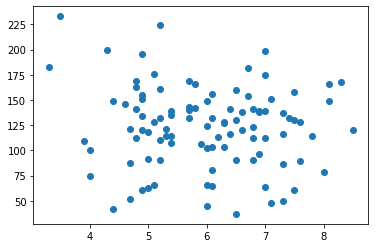

In [20]:
plt.scatter(df['cgpa'],df['iq'])

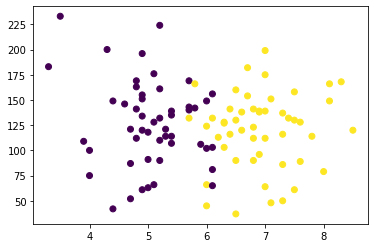

In [21]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])

my work is to understand the data and create a model that differentiates a placement and non placemet candidates

##Extract input and output cols

Assuming that there is relations between the independant variables.
Here the independant variables are cgpa and iq and the dependant variables is placment

In [23]:
x=df.iloc[:,0:2]
y=df.iloc[:,-1]

In [24]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [25]:
y

0     1
1     0
2     0
3     1
4     0
     ..
95    0
96    0
97    1
98    1
99    1
Name: placement, Length: 100, dtype: int64

#Train test split

In [26]:
from sklearn.model_selection import train_test_split

In [28]:
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.1)

In [29]:
x_train

,cgpa,iq
5,7.1,48.0
81,5.4,107.0
28,5.2,90.0
29,7.0,112.0
64,7.0,64.0
...,...,...
66,6.9,96.0
21,7.1,151.0
69,8.5,120.0
14,6.1,103.0


In [30]:
y_train

5     1
81    0
28    0
29    1
64    1
     ..
66    1
21    1
69    1
14    0
31    0
Name: placement, Length: 90, dtype: int64

#Scaling

In [32]:
from sklearn.preprocessing import StandardScaler

In [33]:
scaler = StandardScaler()

In [34]:
x_train = scaler.fit_transform(x_train)

In [35]:
x_train

array([[ 1.05622934e+00, -1.87135785e+00],
       [-5.25014193e-01, -3.58199607e-01],
       [-7.11042844e-01, -7.94194356e-01],
       [ 9.63215015e-01, -2.29965858e-01],
       [ 9.63215015e-01, -1.46100985e+00],
       [-9.90085820e-01,  7.70257389e-01],
       [-2.45971216e-01,  2.82969141e-01],
       [-1.08310015e+00,  1.07801839e+00],
       [-8.97071495e-01, -7.68547606e-01],
       [ 3.12114737e-01, -4.60786607e-01],
       [-9.90085820e-01,  1.92436114e+00],
       [-1.82721475e+00, -1.17889560e+00],
       [-5.99425653e-02, -3.83846357e-01],
       [-5.25014193e-01,  3.59909390e-01],
       [ 4.05129062e-01,  5.13789890e-01],
       [-6.18028518e-01,  8.54891664e-04],
       [ 1.52130097e+00, -8.19841106e-01],
       [-1.17611447e+00, -1.76877085e+00],
       [ 6.84172039e-01,  8.47197639e-01],
       [ 1.42828664e+00,  9.49784638e-01],
       [-8.97071495e-01, -1.48665660e+00],
       [ 1.42828664e+00,  2.31675641e-01],
       [-1.45515745e+00, -2.02523835e+00],
       [ 7.

In [36]:
x_test = scaler.transform(x_test)

In [37]:
x_test

array([[ 0.87020069,  0.43684964],
       [ 1.89335827, -1.0763086 ],
       [-0.71104284,  0.28296914],
       [ 1.70732962, -0.17867236],
       [ 1.52130097,  0.18038214],
       [-1.2691288 ,  0.64202364],
       [-2.29228638,  2.87329088],
       [-1.08310015,  1.23189889],
       [-0.15295689,  1.15495864],
       [ 1.9863726 ,  1.15495864]])

#Train the model

In [38]:
from sklearn.linear_model import LogisticRegression

In [39]:
clf = LogisticRegression()

In [40]:
clf.fit(x_train,y_train)

LogisticRegression()

In [43]:
y_pred =clf.predict(x_test)

In [42]:
y_test

11    1
58    1
19    0
55    1
30    1
39    0
50    0
75    0
85    1
65    1
Name: placement, dtype: int64

In [44]:
from sklearn.metrics import accuracy_score

In [45]:
accuracy_score(y_test,y_pred)

0.9

See how to plot the descision boundary. This gives the clear picture of the pattern choosen by the machine learning model
for that we have to use mix library
ref. the code in http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/

In [46]:
from mlxtend.plotting import plot_decision_regions

we have to pass x_train and y_train values as numpy arrays.  When we use standard scaler, it automatically converts to numpy arrays. 
for ploting we have to convert only y_train to numpy arrays

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


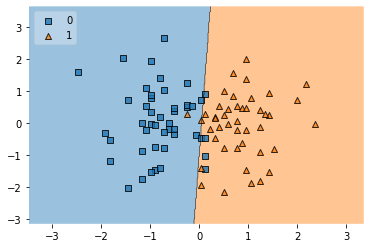

In [47]:
# Plotting decision regions
plot_decision_regions(x_train, y_train.values, clf=clf, legend=2)


Once you are happy with the performance of the model, you have to select the model using pickle to deploy .
Pickle converts all objects to file

In [49]:
import pickle

writing into a file named model.pki with write binary mode

In [51]:
pickle.dump(clf,open('model.pki','wb'))

The last step is to copy the model to website and can be used for analysis using a web page 